**ARIMA**

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare data
df = pd.read_csv("/content/drive/MyDrive/demand.csv", parse_dates=["observation_date"])
df.set_index("observation_date", inplace=True)
series = df["demand"]

# Fit ARIMA model (adjust order as needed)
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# Forecast next steps
forecast = model_fit.forecast(steps=10)
print(forecast)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:                 1038
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2646.994
Date:                Mon, 11 Aug 2025   AIC                           5305.988
Time:                        15:06:10   BIC                           5335.652
Sample:                    01-01-1939   HQIC                          5317.243
                         - 06-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0759      0.021     -3.687      0.000      -0.116      -0.036
ar.L2         -0.4233      0.022    -19.246      0.000      -0.466      -0.380
ar.L3         -0.5520      0.021    -26.671      0.0

**Prophet**

In [ ]:
import pandas as pd
from prophet import Prophet

# ================================
# Load data
# ================================
df = pd.read_csv("/content/drive/MyDrive/demand.csv")  # replace with your file name
df['observation_date'] = pd.to_datetime(df['observation_date'])  # Convert to datetime
df.columns = ['ds', 'y']  # Prophet needs 'ds' and 'y'

# ================================
# Add elapsed time columns
# ================================
start_date = df['ds'].min()
df['days_since'] = (df['ds'] - start_date).dt.days
df['weeks_since'] = df['days_since'] // 7
df['years_since'] = df['days_since'] / 365.25  # approx years including leap years

# ================================
# Hourly Prediction
# ================================
df_hourly = df.resample('H', on='ds').sum().reset_index()  # resample to hourly
model_hourly = Prophet()
model_hourly.fit(df_hourly)

future_hourly = model_hourly.make_future_dataframe(periods=24, freq='H')  # Next 24 hours
forecast_hourly = model_hourly.predict(future_hourly)

# ================================
# Daily Prediction
# ================================
df_daily = df.resample('D', on='ds').sum().reset_index()
model_daily = Prophet()
model_daily.fit(df_daily)
future_daily = model_daily.make_future_dataframe(periods=7, freq='D')  # Next 7 days
forecast_daily = model_daily.predict(future_daily)

# ================================
# Weekly Prediction
# ================================
df_weekly = df.resample('W', on='ds').sum().reset_index()
model_weekly = Prophet()
model_weekly.fit(df_weekly)
future_weekly = model_weekly.make_future_dataframe(periods=4, freq='W')  # Next 4 weeks
forecast_weekly = model_weekly.predict(future_weekly)

# ================================
# Yearly Prediction
# ================================
df_yearly = df.resample('Y', on='ds').sum().reset_index()
model_yearly = Prophet()
model_yearly.fit(df_yearly)
future_yearly = model_yearly.make_future_dataframe(periods=2, freq='Y')  # Next 2 years
forecast_yearly = model_yearly.predict(future_yearly)

# ================================
# Output
# ================================

print("Original Data with days/weeks/years since start:")
print(df.head())

print("\nHourly forecast:")
print(forecast_hourly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

print("\nDaily forecast:")
print(forecast_daily[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

print("\nWeekly forecast:")
print(forecast_weekly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

print("\nYearly forecast:")
print(forecast_yearly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

model_hourly.add_seasonality(name='hourly', period=24, fourier_order=3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_d9sgbj/jkm36nu7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpw_d9sgbj/i5nck1kg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16450', 'data', 'file=/tmp/tmpw_d9sgbj/jkm36nu7.json', 'init=/tmp/tmpw_d9sgbj/i5nck1kg.json', 'output', 'file=/tmp/tmpw_d9sgbj/prophet_model03j4dluv/prophet_model-20250811145849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:58:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:58:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality

Original Data with days/weeks/years since start:
          ds       y  days_since  weeks_since  years_since
0 1939-01-01  3.3336           0            0     0.000000
1 1939-02-01  3.3591          31            4     0.084873
2 1939-03-01  3.4354          59            8     0.161533
3 1939-04-01  3.4608          90           12     0.246407
4 1939-05-01  3.4608         120           17     0.328542

Daily forecast:
          ds      yhat  yhat_lower  yhat_upper
0 1939-01-01  0.617949  -15.538693   15.628557
1 1939-01-02  0.609988  -15.259931   16.575148
2 1939-01-03  0.595919  -16.020045   16.032296
3 1939-01-04  0.603391  -14.956733   16.026845
4 1939-01-05  0.564059  -14.089460   16.072867

Weekly forecast:
          ds      yhat  yhat_lower  yhat_upper
0 1939-01-01  2.546801  -36.803374   37.671991
1 1939-01-08  2.784155  -34.650720   39.833711
2 1939-01-15 -0.003556  -35.406830   36.436764
3 1939-01-22 -2.756358  -39.734101   31.418936
4 1939-01-29 -2.515547  -38.108671   36.71417

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


**LSTM Univariate**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and scale data
df = pd.read_csv("/content/drive/MyDrive/demand.csv", parse_dates=["observation_date"])
data = df["demand"].values.reshape(-1,1)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# Prepare sequences
def create_sequences(data, seq_len=10):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 10
X, y = create_sequences(scaled, SEQ_LEN)
X_train, y_train = X, y

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# Forecasting
last_seq = scaled[-SEQ_LEN:].reshape(1, SEQ_LEN, 1)
pred = model.predict(last_seq)
pred_rescaled = scaler.inverse_transform(pred)
print("Next demand forecast:", pred_rescaled.flatten()[0])

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.1258 - val_loss: 0.0105
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0037 - val_loss: 0.0110
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 0.0081
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0073
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0074
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0076
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - val_loss: 0.0072
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0016 - val_loss: 0.0073
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0075
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0071
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - val_loss: 0.0070
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
Next demand forecast: 112.85433


**LSTM Multivariate**

In [1]:
# multivariate_lstm_example.py
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------
# 1) Fake example dataset
# ---------------------------
# create a synthetic multivariate timeseries: 3 features
np.random.seed(42)
n_samples = 2000
t = np.arange(n_samples)
feat1 = np.sin(0.02 * t)            # seasonal signal
feat2 = 0.001 * t + 0.1 * np.random.randn(n_samples)  # slow trend + noise
feat3 = np.cos(0.04 * t) * 0.5     # another seasonal

df = pd.DataFrame({
    "feat1": feat1,
    "feat2": feat2,
    "feat3": feat3
})

# target: next-step value of feat1 (you can change to any other variable or multi-output)
df['target'] = df['feat1'].shift(-1)
df = df.dropna().reset_index(drop=True)

# ---------------------------
# 2) Scale features
# ---------------------------
feature_cols = ['feat1', 'feat2', 'feat3']
target_col = ['target']

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(df[feature_cols])
y_scaled = scaler_y.fit_transform(df[target_col])

# ---------------------------
# 3) Windowing (create sequences)
# ---------------------------
def create_sequences(X, y, seq_len=30):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:(i + seq_len)])
        ys.append(y[i + seq_len])  # predicting single step after window
    return np.array(Xs), np.array(ys)

SEQ_LEN = 30
X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_len=SEQ_LEN)

# ---------------------------
# 4) Train/test split
# ---------------------------
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

print("X_train shape:", X_train.shape)  # (n_samples, seq_len, n_features)
print("y_train shape:", y_train.shape)  # (n_samples, 1)

# ---------------------------
# 5) Build LSTM model
# ---------------------------
n_features = X_train.shape[2]

model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, n_features), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # single-step, single-output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ---------------------------
# 6) Train
# ---------------------------
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

# ---------------------------
# 7) Evaluate and predict
# ---------------------------
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {loss:.6f}, Test MAE: {mae:.6f}")

# predict and invert scaling
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_true = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Test RMSE (original scale): {rmse:.6f}")

# show a small sample
for i in range(5):
    print(f"true={y_true[i,0]:.4f}  pred={y_pred[i,0]:.4f}")

X_train shape: (1575, 30, 3)
y_train shape: (1575, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
40/40 - 9s - 214ms/step - loss: 0.0989 - mae: 0.2261 - val_loss: 0.0086 - val_mae: 0.0714
Epoch 2/100
40/40 - 1s - 29ms/step - loss: 0.0123 - mae: 0.0833 - val_loss: 0.0038 - val_mae: 0.0541
Epoch 3/100
40/40 - 0s - 9ms/step - loss: 0.0082 - mae: 0.0695 - val_loss: 0.0021 - val_mae: 0.0404
Epoch 4/100
40/40 - 1s - 15ms/step - loss: 0.0071 - mae: 0.0611 - val_loss: 0.0019 - val_mae: 0.0362
Epoch 5/100
40/40 - 1s - 16ms/step - loss: 0.0044 - mae: 0.0476 - val_loss: 6.2093e-04 - val_mae: 0.0207
Epoch 6/100
40/40 - 0s - 9ms/step - loss: 0.0045 - mae: 0.0465 - val_loss: 6.8164e-04 - val_mae: 0.0250
Epoch 7/100
40/40 - 0s - 10ms/step - loss: 0.0041 - mae: 0.0447 - val_loss: 3.9306e-04 - val_mae: 0.0160
Epoch 8/100
40/40 - 1s - 15ms/step - loss: 0.0034 - mae: 0.0403 - val_loss: 1.0705e-04 - val_mae: 0.0083
Epoch 9/100
40/40 - 0s - 9ms/step - loss: 0.0034 - mae: 0.0415 - val_loss: 5.3196e-04 - val_mae: 0.0214
Epoch 10/100
40/40 - 0s - 9ms/step - loss: 0.0031 - mae: 0.0386 - val_los

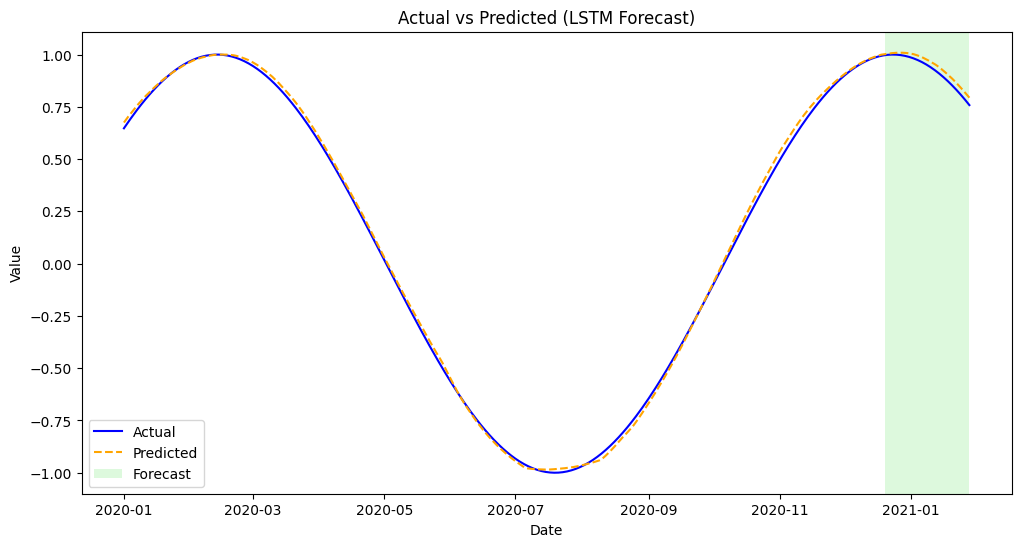

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have y_true, y_pred (both shape [n,1]) and a corresponding datetime index
df_plot = pd.DataFrame({
    'Actual': y_true.flatten(),
    'Predicted': y_pred.flatten()
}, index=pd.date_range(start='2020-01-01', periods=len(y_true), freq='D'))

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df_plot['Actual'], label='Actual', color='blue')

# Plot predictions
plt.plot(df_plot['Predicted'], label='Predicted', linestyle='--', color='orange')

# Highlight forecasted area (e.g., last 10%)
highlight_start = int(0.9 * len(df_plot))
plt.axvspan(df_plot.index[highlight_start], df_plot.index[-1], facecolor='lightgreen', alpha=0.3, label='Forecast')

plt.title("Actual vs Predicted (LSTM Forecast)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()